In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# synthetic dataset for classification (binary) 
X, y = make_classification(n_samples = 500, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

Question 1: Use cross_var_score to apply logistic regression and cross validation with 5 folds to the dataset X,y as above.

In [2]:
# Import Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cvnum = 5
log_reg = LogisticRegression(solver = "lbfgs")
cv_scores = cross_val_score(log_reg, X, y, cv=cvnum)

print('Cross-validation scores ({}-fold): {}'.format(cvnum,cv_scores))
print('Mean cross-validation score ({}-fold): {:.3f}'
     .format(cvnum,np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.75247525 0.74257426 0.74       0.64646465 0.72727273]
Mean cross-validation score (5-fold): 0.722


Question 2: Use validation_curve and 5 folds to see the effect of changing the parameter C in LogisticRegression. This parameter controls regularization. Low values of C is high amounts of regularization, and high values of C are low amounts of Regularization. You should use powers of 10 varying from $10^{-3}$ to $10^3$.  Graph the training scores versus the testing scores. Use plt.loglog() instead of plt.plot() for a log scale plot. What is the best value of C? What's your best score?


[[0.67669173 0.67669173 0.6675     0.680798   0.67581047]
 [0.68671679 0.69423559 0.6875     0.69825436 0.69825436]
 [0.70676692 0.72180451 0.715      0.73815461 0.71820449]
 [0.71428571 0.72932331 0.7225     0.73815461 0.72319202]
 [0.71428571 0.72932331 0.7225     0.74314214 0.72568579]
 [0.71428571 0.72932331 0.7225     0.74314214 0.72568579]
 [0.71428571 0.72932331 0.7225     0.74314214 0.72568579]]
average across folds [0.67549839 0.69299222 0.71998611 0.72549113 0.72698739 0.72698739
 0.72698739]
standard deviation [0.00435903 0.00502935 0.01035552 0.00793528 0.00948257 0.00948257
 0.00948257]
[[0.66336634 0.67326733 0.7        0.65656566 0.66666667]
 [0.66336634 0.71287129 0.73       0.67676768 0.66666667]
 [0.73267327 0.73267327 0.77       0.66666667 0.6969697 ]
 [0.75247525 0.74257426 0.74       0.64646465 0.72727273]
 [0.75247525 0.74257426 0.74       0.64646465 0.72727273]
 [0.75247525 0.74257426 0.74       0.64646465 0.72727273]
 [0.75247525 0.74257426 0.74       0.64646465

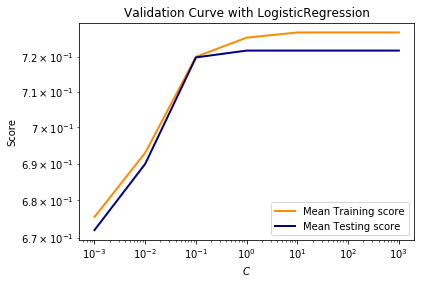

In [3]:
from sklearn.model_selection import validation_curve

#create a varying array C
C = [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]
param_range = C

log_reg = LogisticRegression(solver = "lbfgs")
# input parameter range as C 
train_scores, test_scores = validation_curve(log_reg, X, y, param_name = 'C', param_range = C , cv = 5)

print(train_scores)
print("average across folds",np.mean(train_scores, axis=1))
print("standard deviation",np.std(train_scores, axis=1))
## training scores for each fold [columns], for each k [rows]
## row 1 is 1 nearest neighbor, etc

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(test_scores)
print("average across folds",np.mean(test_scores, axis=1))
print("standard deviation",np.std(test_scores, axis=1))

plt.title('Validation Curve with LogisticRegression')
plt.xlabel('$C$')
plt.ylabel('Score')
plt.xticks(param_range)
lw = 2
# use log scale
plt.loglog(param_range, train_scores_mean, label='Mean Training score',color='darkorange', lw=lw)
plt.loglog(param_range, test_scores_mean, label='Mean Testing score',color='navy', lw=lw)
plt.legend(loc='best')
plt.show()

The best value of C is $10^{-1}$ because anything past that then the model starts to overfit, the best score is 0.71998611.

Question 3: Use gridseachCV to find the best paramaters to use for kNN with this model. You should vary over $p$ and n_neighbors. You pick the ranges to try. What's your best parameter set and score? How does it compare to LogisticRegression? Then use a larger grid and RandomSearch to see if you can do any better.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

param_range = range(1,12,2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y,
                                            param_name='n_neighbors',
                                            param_range=param_range, cv=cvnum)

grid_values = {'n_neighbors': param_range}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, cv=5, iid=False)
grid_clf_acc.fit(X, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc.best_score_))

grid_clf_acc.best_estimator_

k_range = range(1,50,2)
p_range=[1,2,3,4,5]
grid_values = {'n_neighbors': k_range,'p':p_range}

grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, cv=5, iid=False)
grid_clf_acc.fit(X, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc.best_score_))

Grid best parameter (max. accuracy):  {'n_neighbors': 7}
Grid best score (accuracy): 0.826
Grid best parameter (max. accuracy):  {'n_neighbors': 19, 'p': 3}
Grid best score (accuracy): 0.846


The best paramter is `n_neighbors : 19` and `p : 3` with an accuracy of 0.846. The accuracy from the knn is better than the logistic regression which only had an accuracy of $\approx$ 0.72.  I messed around with the k_range and p_range, and increasing it to 50 instead of 30 did not change the best parameter.


In [16]:
## RANDOM SEARCH

from sklearn.model_selection import RandomizedSearchCV
k_rangeR = range(1,50,2)
p_rangeR =[1,2,3,4,5,6,7,8,9]
grid_valuesR = {'n_neighbors': k_range1,'p':p_range1}

random_search=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=grid_valuesR, cv=cvnum, iid=False)
random_search.fit(X,y)

print('Rand Search best parameter (max. accuracy):',random_search.best_params_)
print('Rand Search best score (accuracy): {:.3f}'.format(random_search.best_score_))

Rand Search best parameter (max. accuracy): {'p': 5, 'n_neighbors': 7}
Rand Search best score (accuracy): 0.832


Question 4: For each of the following confusion matrices, compute accuracy, precision, recall, and false positive rate. Do not change any of the parameters here. 



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5) 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='lbfgs').fit(X_train,y_train)
confusion = confusion_matrix(y_test,log_reg.predict(X_test))
print(confusion)

[[51 17]
 [15 42]]


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))
print('Precision: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('Recall: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('F1: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))

Accuracy: 0.74
Precision: 0.71
Recall: 0.74
F1: 0.72


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2).fit(X_train,y_train)
confusion = confusion_matrix(y_test,knn.predict(X_test))
print(confusion)

[[64  4]
 [ 8 49]]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, knn.predict(X_test))))
print('Precision: {:.2f}'.format(precision_score(y_test, knn.predict(X_test))))
print('Recall: {:.2f}'.format(recall_score(y_test, knn.predict(X_test))))
print('F1: {:.2f}'.format(f1_score(y_test, knn.predict(X_test))))

Accuracy: 0.90
Precision: 0.92
Recall: 0.86
F1: 0.89


Question 5: Read/run the rest of the Day 14 Jupyter Notebook for the sections on DummyClassifiers, Precision/Recall curves and ROC curves. There is one line that doesn't work. Remove it. What questions do you have about these concepts/implementations? Write at least two.

- is it neccesary that y is `y_binary_imbalanced` or can a ROC curve be generated using any continuous/discrete y values.
- would multiclass data affect the classifier coefficients?